# <font color = red>**What is Sentiment analysis?**</font>

Sentiment analysis is basically understanding the mood of a sentence, whether it's happy, sad, angry or indifferent. To understand the concept we are making use of a Hotel review dataset, which has collection of consumer feedback. Our job here is to categorise this feedback based on it's sentiment. Let us look at our dataset now.  

## <font color = blue>**1. Importing the libraries**</font>

In [1]:
# Importing the library
import pandas as pd


## <font color = blue>**2. Reading the data**</font>

In [2]:
# Reading the data
Reviewdata = pd.read_csv("train.csv")

In [3]:
# Preview data
Reviewdata.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


From the above data only 'Description' & 'Is_Response' columns are relevant for sentiment analysis, since these columns accurately describe the mood of the text.

In [4]:
# Transpose function will swap the rows for columns and vice versa
Reviewdata.transpose()

,0,1,2,3,4,5,6,7,8,9,...,38922,38923,38924,38925,38926,38927,38928,38929,38930,38931
User_ID,id10326,id10327,id10328,id10329,id10330,id10331,id10332,id10333,id10334,id10335,...,id49248,id49249,id49250,id49251,id49252,id49253,id49254,id49255,id49256,id49257
Description,The room was kind of clean but had a VERY stro...,I stayed at the Crown Plaza April -- - April -...,I booked this hotel through Hotwire at the low...,Stayed here with husband and sons on the way t...,My girlfriends and I stayed here to celebrate ...,We had - rooms. One was very nice and clearly ...,My husband and I have stayed in this hotel a f...,My wife & I stayed in this glorious city a whi...,My boyfriend and I stayed at the Fairmont on a...,"Wonderful staff, great location, but it was de...",...,This hotel has a great location if you want to...,I am pretty impartial to this hotel. I would d...,We booked a room with two single beds. Upon ar...,Arrived via taxi from La Guardia - driving int...,I tend to post reviews only when I’ve had an e...,We arrived late at night and walked in to a ch...,The only positive impression is location and p...,Traveling with friends for shopping and a show...,The experience was just ok. We paid extra for ...,The Westin is a wonderfully restored grande da...
Browser_Used,Edge,Internet Explorer,Mozilla,InternetExplorer,Edge,InternetExplorer,Firefox,Google Chrome,Internet Explorer,Chrome,...,Edge,Edge,Internet Explorer,Mozilla,Firefox,Edge,InternetExplorer,Firefox,Chrome,Mozilla
Device_Used,Mobile,Mobile,Tablet,Desktop,Tablet,Desktop,Tablet,Mobile,Desktop,Tablet,...,Desktop,Mobile,Desktop,Mobile,Desktop,Desktop,Mobile,Mobile,Desktop,Desktop
Is_Response,not happy,not happy,not happy,happy,not happy,happy,not happy,happy,happy,not happy,...,not happy,not happy,happy,happy,not happy,happy,not happy,not happy,not happy,happy


## <font color = blue>**3. Data Cleaning**</font>

### <font color = green>**3.1 Null value check**</font>

For the null value check, we are first calculating the total null values in Reviewdata, arranging them in descending order and storing it in a variable 'count'. We are further calculating the total percentage of null value count and constructing a concatenated dataframe having both count and percentage as columns.We arrange these values in descending order as well. This dataframe will show us the decreasing count of null values and their respective percentages.

In [5]:
# Data cleaning / EDA
# Here we are counting the null values and check their % count from the total dataset.
# Once done we are constructing a dataframe and concatenating the values and title inside.
# To treat the null values the percentage count should be greater than 30.

count = Reviewdata.isnull().sum().sort_values(ascending = False)
percentage = ((Reviewdata.isnull().sum()/len(Reviewdata)*100)).sort_values(ascending=False)
missing_data = pd.concat([count, percentage], axis = 1, keys = ['Count', 'Percentage'])

print('Count & percentage of the missing values of the columns:')

missing_data

Count & percentage of the missing values of the columns:


,Count,Percentage
User_ID,0,0.0
Description,0,0.0
Browser_Used,0,0.0
Device_Used,0,0.0
Is_Response,0,0.0


## <font color = blue>**4. EDA**</font>

Now we are performing Exploratory Data Analysis to check the value count distribution of the 2 moods in the 'Is_Response' column. Initially we are calculating the % of total value count from 'Is_Response' column and then we are plotting the same using a bar graph. For EDA we have use matplotlib as the library.

Percentage for default

Is_Response
happy        68.12
not happy    31.88
Name: proportion, dtype: float64


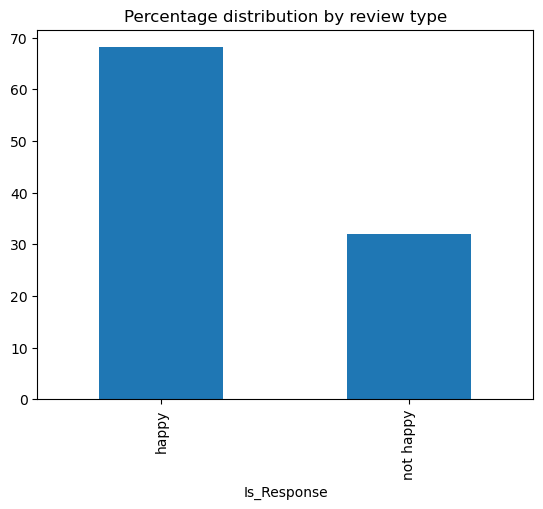

In [6]:
# Plotting the graphs and checking the distribution

# here we are taking the value counts of the Is repsonse column for all the sentiment 'happy' and 'not happy'
# We are then formatting the values using round function (multiplying the value by 100) and considering only 2
# decimal places.
# We are then plotting a bar graph of these formatted values.


import matplotlib.pyplot as plt

print('Percentage for default\n')
print(round(Reviewdata.Is_Response.value_counts(normalize = True)*100,2))
round(Reviewdata.Is_Response.value_counts(normalize = True)*100,2).plot(kind='bar')

plt.title('Percentage distribution by review type')
plt.show()

## <font color = blue>**5. Dropping unnecessary columns**</font>

The next step is to filter out the unnecessary columns that do not contribute much in sentiment analysis, so we are going to drop them. These columns are 'User_ID','Browser_Used' & 'Device_Used'.

In [7]:
# Dropping unnecessary columns
# Here we are dropping 'User_ID','Browser_Used','Device_Used' since they do not carry much significance
# while doing sentiment analysis.

Reviewdata.drop(columns= ['User_ID','Browser_Used','Device_Used'],inplace = True)

In [8]:
Reviewdata.head()

,Description,Is_Response
0,The room was kind of clean but had a VERY stro...,not happy
1,I stayed at the Crown Plaza April -- - April -...,not happy
2,I booked this hotel through Hotwire at the low...,not happy
3,Stayed here with husband and sons on the way t...,happy
4,My girlfriends and I stayed here to celebrate ...,not happy


## <font color = blue>**6. Applying 1st level cleaning**</font>

Now that we have our essential columns, it is important that we clean those columns well. So by cleaning I mean applying certain steps to make sure the input data is interpretable before we apply train test split.


In [9]:
# Apply first level cleaning

import re
import string

# This function converts to lower_case, removes square brackets, remove numbers and punctuations

def text_clean_1(text):
    text = text.lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub('[%s]'% re.escape(string.punctuation), '',text)
    text = re.sub('\w*\d\w*','', text)
    return text

cleaned1 = lambda x : text_clean_1(x)

The import 're' statement imports Python's regular expression module, which allows for pattern matching and manipulation of strings using regular expressions.

The import string statement imports Python's 'string' module, which provides a collection of string constants and utility functions.

The function text_clean_1(text) is defined with one parameter text, which represents the input text to be cleaned.

Inside the function:
**text = text.lower()** converts the input text to lowercase using the lower() method, making the text case-insensitive.

**text = re.sub('\[.*?\]','',text)** uses regular expressions to remove square brackets and their contents from the text. Here, re.sub() is a method for substituting occurrences of a pattern in a string with another string. The pattern '\[.*?\]' matches any text within square brackets, and '' is used as the replacement to remove them.

**text = re.sub('[%s]'% re.escape(string.punctuation), '',text)** removes punctuations from the text. re.escape(string.punctuation) escapes all the characters in string.punctuation so that they can be used in a regular expression pattern. The pattern [...] matches any character inside the square brackets, and the re.sub() function replaces them with an empty string, effectively removing them.

**text = re.sub('\w*\d\w*','', text)** removes any words containing digits from the text. The pattern \w*\d\w* matches any word containing one or more digits. Again, re.sub() is used to replace these words with an empty string.
The function returns the cleaned text.

Finally, a **lambda function** cleaned1 is defined, which takes an input x and applies the text_clean_1 function to it. This lambda function can be used to clean text strings.

## <font color = blue>**7. Adding 1st cleaned column to the dataframe**</font>

Now let us add our extracted clean text as a column to our original dataframe using pandas.

In [10]:
# Adding the cleaned text as a column using a dataframe
Reviewdata['cleaned_description'] = pd.DataFrame(Reviewdata.Description.apply(cleaned1))
Reviewdata.head(10)

,Description,Is_Response,cleaned_description
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...
5,We had - rooms. One was very nice and clearly ...,happy,we had rooms one was very nice and clearly ha...
6,My husband and I have stayed in this hotel a f...,not happy,my husband and i have stayed in this hotel a f...
7,My wife & I stayed in this glorious city a whi...,happy,my wife i stayed in this glorious city a whil...
8,My boyfriend and I stayed at the Fairmont on a...,happy,my boyfriend and i stayed at the fairmont on a...
9,"Wonderful staff, great location, but it was de...",not happy,wonderful staff great location but it was defi...


## <font color = blue>**8. Applying 2nd level cleaning**</font>

In [11]:
# Apply a second round of cleaning
# So when you are converting a pdf file to text file we get unnecessary apostrophe or colon & also
# unncessary shift to the next line '\n' hence we need to do the second round of cleaning

def text_clean_2(text):
    text = re.sub('[''""...]','',text)
    text = re.sub('\n','',text)
    return text

cleaned_2 = lambda x: text_clean_2(x)

This pattern matches single quotes ('), double quotes ("), and the ellipsis character (…), and replaces them with an empty string.

text = re.sub('\n','',text) removes newline characters (\n) from the text, effectively removing line breaks.

The function returns the cleaned text.
The lambda function cleaned_2 is defined, which takes an input x and applies the text_clean_2 function to it.

## <font color = blue>**9. Adding 2nd cleaned column to the dataframe**</font>

Now let us add the second cleaned column using pandas dataframe as well.

In [12]:
# Adding the cleaned text as a column using a dataframe
Reviewdata['cleaned_description_new'] = pd.DataFrame(Reviewdata.Description.apply(cleaned_2))
Reviewdata.head(10)

,Description,Is_Response,cleaned_description,cleaned_description_new
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...,The room was kind of clean but had a VERY stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...,I stayed at the Crown Plaza April -- - April -...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...,I booked this hotel through Hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...,Stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...,My girlfriends and I stayed here to celebrate ...
5,We had - rooms. One was very nice and clearly ...,happy,we had rooms one was very nice and clearly ha...,We had - rooms One was very nice and clearly h...
6,My husband and I have stayed in this hotel a f...,not happy,my husband and i have stayed in this hotel a f...,My husband and I have stayed in this hotel a f...
7,My wife & I stayed in this glorious city a whi...,happy,my wife i stayed in this glorious city a whil...,My wife & I stayed in this glorious city a whi...
8,My boyfriend and I stayed at the Fairmont on a...,happy,my boyfriend and i stayed at the fairmont on a...,My boyfriend and I stayed at the Fairmont on a...
9,"Wonderful staff, great location, but it was de...",not happy,wonderful staff great location but it was defi...,"Wonderful staff, great location, but it was de..."


## <font color = blue>**10. Applying train_test_split**</font>

Then we perform the traditional Train-test split where we are initially defining the dependent (y) and independent variable (x). The only difference here is I have written 'x' as dependent_var and 'y' as independent_var.

In [13]:
# Training the model
# here we are performing traditional train test split on Independent var (y = cleaned_description_new)
# & dependent_var ( x = Is_Response). Once done, we are checking the length of the train & test data.

from sklearn.model_selection import train_test_split

Independent_var = Reviewdata.cleaned_description_new
Dependent_var = Reviewdata.Is_Response

IV_train, IV_test, DV_train, DV_test = train_test_split(Independent_var,Dependent_var,
                                                         test_size=0.1,random_state=225)

print('IV train :', len(IV_train))

print('IV test :', len(IV_test))

print('DV train :', len(DV_train))

print('DV test :', len(DV_test))

IV train : 35038
IV test : 3894
DV train : 35038
DV test : 3894


## <font color = blue>**11. Applying Tfidf vectorizer**</font>

Tfidf vectorizer make use of product of Term frequency and Inverse Document Frequency to assign importance to the essential words. It is then followed by applying a logistic regression to help classify the sentiment properly. solver = 'lbfgs' is generally used or code optimization.
Both these functions we are first placing inside a pipeline and then fitting them on train data of dependent and independent variable.

In [14]:
# We are using TfidVectorizer to give relevant words the importance.
# We are also performing Logistic regression, while fitting however we are using a pipeline function that
# passes the value to the model as a pipeline and fits the model on the train data.
# 'lbfgs' is used to optimize the code

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver='lbfgs')


In [15]:
from sklearn.pipeline import Pipeline

model = Pipeline([('vectorizer',tvec),('classifier', clf2)])
model.fit(IV_train,DV_train)



C:\Users\ninad\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression())])

## <font color = blue>**12. Evaluating the model**</font>

Let us evaluate the model and see for ourselves how accurate our model is. For evaluation we are using confusion matrix, accuracy score, precision score & recall score.




In [16]:
# checking the model evaluation using confusion matrix, accuracy_score,precision_score & recall_score


from sklearn.metrics import confusion_matrix

predictions = model.predict(IV_test)
confusion_matrix(predictions,DV_test)

array([[2416,  301],
       [ 155, 1022]], dtype=int64)

We could see considerable amount of misclassified predicted values, 155 being False Negative and 301 being False positive. Let us check the accuracy, precision score and recall value now.

In [17]:
from sklearn.metrics import accuracy_score,precision_score, recall_score

print("Accuracy : ",accuracy_score(predictions, DV_test))
print("Precision : ",precision_score(predictions, DV_test,average = 'weighted'))
print("Recall : ",recall_score(predictions, DV_test, average = 'weighted'))

Accuracy :  0.8828967642526965
Precision :  0.8891666432094545
Recall :  0.8828967642526965


## <font color = blue>**13. Testing the model**</font>

We test the model now to see how it performs.

In [18]:
# Testing the model

example = ['The hotel was very good']

result = model.predict(example)

print(result)

['happy']


As seen above, the sentiment 'The hotel was very good' was categorized as 'happy' indicating the model is working fine. This is how one can go ahead and predict the sentiment of a sentence. One thing to understand here is that the prediction here is a classification based which means we are categorizing the sentiments into different classes at the end of the model. The output 'happy' is a class.